In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm
from scipy.cluster.hierarchy import dendrogram, linkage

Carga de Datos y Verficación de Data

In [61]:
# Cargar el archivo clases.txt
clases = pd.read_csv('clase.txt', delimiter=',')
# print(clases_mat)

# Cargar el archivo datasettissue.txt
data = pd.read_csv('dataset_tissue.txt', delimiter=',')
data = data.T
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
Unnamed: 0,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.92169,5.71819,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.33913,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.96243,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.41598,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.60365,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,7.095949,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.90008,6.982293,5.998825,6.779777,5.370535,...,7.056859,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.07374
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,8.314995,5.65109,7.5469,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.64366,5.501452,...,7.860281,5.741697,7.509888,7.643282,8.384567,6.64589,7.64461,8.195537,8.589336,7.627872


In [62]:
#Escalamos la data para que todas la variables trabajen en la misma escala y la distancia que manejan los algoritmos no se confundan y den más peso a una variable que a otra.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_escaled = scaler.fit_transform(data.drop(['Unnamed: 0'], axis=0))
# print(data_escaled.shape)
data_escaled = data.drop(['Unnamed: 0'], axis=0)

Redimensión de la matriz Data: PCA

In [63]:
data_escaled = pd.DataFrame(data_escaled, columns = data.drop(['Unnamed: 0'], axis=0).columns)
data_escaled

,0,1,2,3,4,5,6,7,8,9,...,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.92169,5.71819,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.33913,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.96243,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.41598,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.60365,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
GSM12067.CEL.gz,10.157605,6.606701,8.116336,10.832528,5.334905,8.303227,7.078587,5.728177,8.967108,5.484559,...,8.205598,5.612748,6.581476,8.577977,8.064061,6.438092,6.053994,7.971105,8.421945,7.54057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,7.095949,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.90008,6.982293,5.998825,6.779777,5.370535,...,7.056859,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.07374
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,8.314995,5.65109,7.5469,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.64366,5.501452,...,7.860281,5.741697,7.509888,7.643282,8.384567,6.64589,7.64461,8.195537,8.589336,7.627872


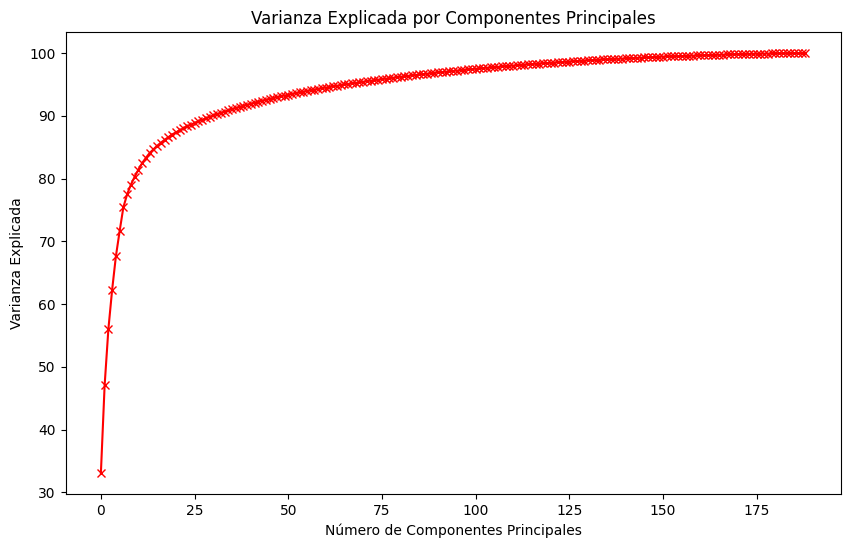

In [64]:
pca = PCA()
pca.fit(data_escaled)
pca_data = pca.transform(data_escaled)

explained_variance = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance,'r-x')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

In [65]:
#Como vemos basta con 75 componentes para explicar el 90% de la varianza de los datos.
pca_data = pd.DataFrame(pca_data[:,0:75])
pca_data = pca_data.values

K-Means

In [66]:
def Init_Centroide(data, k):#Implementación k++ para inicializar los centroides
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

In [67]:
def get_cluster(data, centroides):
    distancias = np.linalg.norm(data[:, np.newaxis, :] - centroides, axis=2)
    clusters = np.argmin(distancias, axis=1)
    return clusters

In [68]:
def return_new_centroide(grupos, data, k):
    new_centroides = np.zeros((k, data.shape[1]))#Matriz de ceros de k filas y n columnas en donde irán los nuevos centroides
    for i in range(k):
        cluster_points = data[grupos == i]
        if cluster_points.size > 0:
            new_centroides[i] = np.mean(cluster_points, axis=0)
    return new_centroides

In [69]:
def distancia_promedio_centroides(old_centroide, new_centroide):
    distancias = [np.linalg.norm(old - new) for old, new in zip(old_centroide, new_centroide)]

    distancia_promedio = np.mean(distancias)

    return distancia_promedio

In [70]:
def kmeans(data, k, umbral):
    centroides = Init_Centroide(data, k)
    clusters = get_cluster(data, centroides)
    new_centroides = return_new_centroide(clusters, data, k)
    # print("old", centroides)
    # print("new", new_centroides)
    while distancia_promedio_centroides(centroides, new_centroides) > umbral:
        # print("CENTROIDES", centroides, distancia_promedio_centroides(centroides, new_centroides))
        centroides = new_centroides
        clusters = get_cluster(data, centroides)
        new_centroides = return_new_centroide(clusters, data, k)

    return new_centroides, clusters

Encontrando el K óptimo

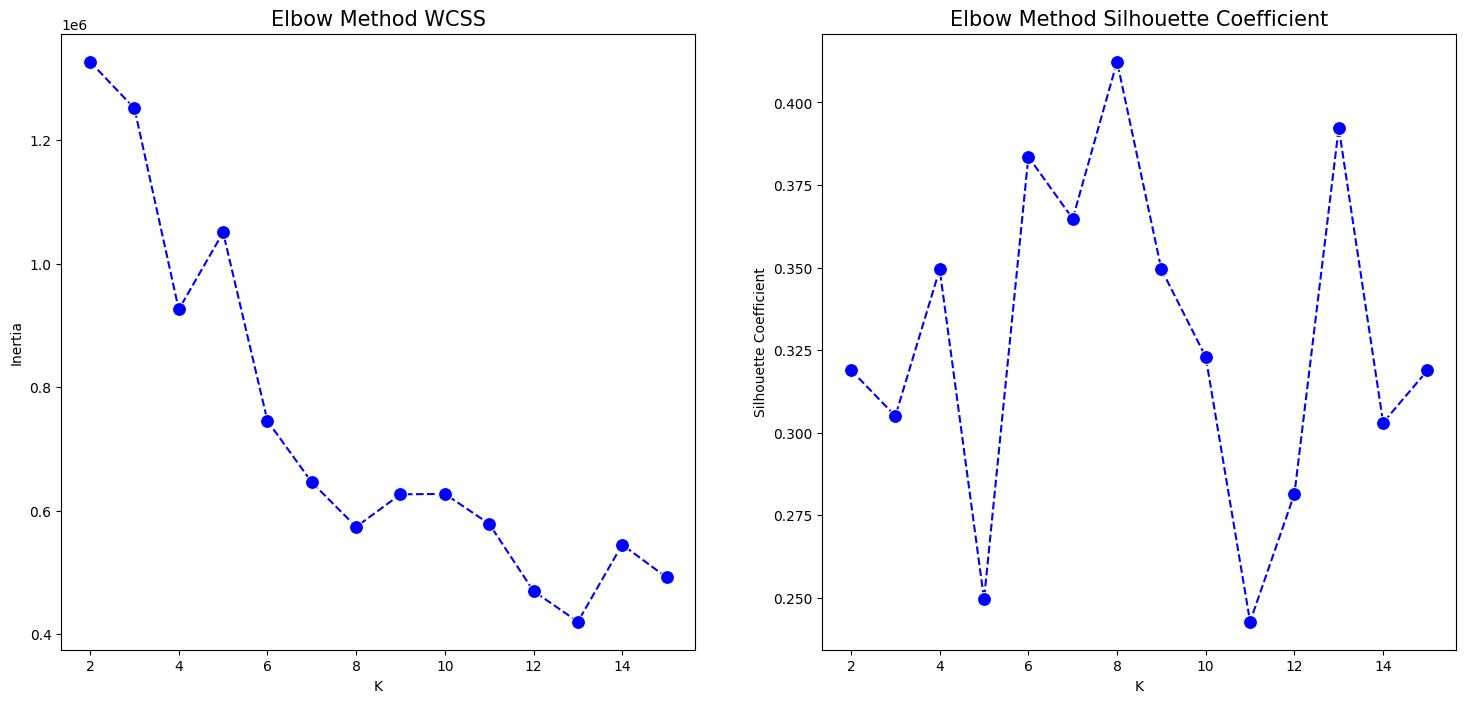

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def distance(v1, v2):
    return np.linalg.norm(v1 - v2)

def suma_cuadrados_distancias(data, centroides, clusters):
    distances = np.sum((data - centroides[clusters])**2, axis=1)
    return np.sum(distances)

def silhouette(data, clusters):
    n = len(data)
    a = np.zeros(n)
    b = np.zeros(n)

    for i in range(n):
        cluster_i = clusters[i]
        cluster_points_i = data[clusters == cluster_i]
        a[i] = np.mean(np.linalg.norm(data[i] - cluster_points_i, axis=1))

        min_b = np.inf
        for j in range(n):
            if clusters[j] != cluster_i:
                cluster_points_j = data[clusters == clusters[j]]
                dist = np.mean(np.linalg.norm(data[i] - cluster_points_j, axis=1))
                min_b = min(min_b, dist)
        b[i] = min_b

    silhouette_values = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_values)

def metricas(data, max_k, umbral):
    distancias = []
    silhouettes = []
    for k in range(2, max_k + 1):
        centroides, clusters = kmeans(data, k, umbral)
        suma_distancias = suma_cuadrados_distancias(data, centroides, clusters)
        silhouette_value = silhouette(data, clusters)
        distancias.append(suma_distancias)
        silhouettes.append(silhouette_value)

    return distancias, silhouettes

umbral = 4.5
max_k = 15
K = range(2, max_k + 1)

distancias, silhouette_scores = metricas(pca_data, max_k, umbral)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for i, (values, title) in enumerate([(distancias, 'Elbow Method WCSS'), (silhouette_scores, 'Elbow Method Silhouette Coefficient')]):
    sns.lineplot(ax=axes[i], x=K, y=values, linestyle='dashed', marker='o', markersize=10, color='b')
    axes[i].set_xlabel('K')
    axes[i].set_ylabel('Inertia' if i == 0 else 'Silhouette Coefficient')
    axes[i].set_title(title, size=15)

plt.show()
# Inicializar listas para almacenar las métricas

CON LIBRERIA

In [72]:
k=11
km = KMeans(n_clusters=k)
y_km = km.fit_predict(pca_data)
print(y_km)
print(km.cluster_centers_.shape)
print(silhouette_score(pca_data, y_km))
data_temp = data
data_temp_column = data_temp.iloc[0]
data_temp_complete = pd.DataFrame(data_temp)
data_temp_complete = data_temp_complete[1:]
data_temp.columns = data_temp_column
data_temp_complete['cluster'] = y_km
data_temp_complete

[ 7  9  7  9  9  7  9  7  9  7  9  7  9  7  9  7  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  7  9  9  7  9  9  9  9  7  9  9  9  9  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  1  1  1  2  2  2  1  1  1  2  2  2  1  1  6  5  2  2  2  2  2  2 10 10
 10 10 10 10  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  2  2  2  2  2
  2  2  2  2  2  2  2  0  0  0  0  0  6  6  6  4  4  4  4  4  4]
(11, 75)
0.41420408912965373


d:\Proyectos_2023\Machine_Learning\Proyecto_2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,2,3,4,5,6,7,8,9,...,22206,22207,22208,22209,22210,22211,22212,22213,22214,cluster
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.92169,5.71819,8.082076,5.434304,...,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.33913,7.367797,7
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.96243,5.596042,7.568178,5.281319,...,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.41598,8.214426,7.917754,9
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461,7
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.60365,7.115067,5.860551,8.605091,5.375391,...,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779,9
GSM12067.CEL.gz,10.157605,6.606701,8.116336,10.832528,5.334905,8.303227,7.078587,5.728177,8.967108,5.484559,...,5.612748,6.581476,8.577977,8.064061,6.438092,6.053994,7.971105,8.421945,7.54057,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151,4
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.90008,6.982293,5.998825,6.779777,5.370535,...,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.07374,4
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,5.65109,7.5469,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719,4
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.64366,5.501452,...,5.741697,7.509888,7.643282,8.384567,6.64589,7.64461,8.195537,8.589336,7.627872,4


In [73]:
#Obtengo el nombre de las filas
rows = data_temp.drop(['Unnamed: 0'], axis=0).index
clases_temp = clases
clases_temp.index = rows
clases_temp

for i in range(0, k):
    print("Cluster: ", i)
    indices = data_temp_complete[data_temp_complete['cluster'] == i].index.values
    print(clases_temp['x'][indices])
    print("")

Cluster:  0
GSM322969.CEL.gz    cerebellum
GSM323054.CEL.gz    cerebellum
GSM323523.CEL.gz    cerebellum
GSM323524.CEL.gz    cerebellum
GSM323527.CEL.gz    cerebellum
Name: x, dtype: object

Cluster:  1
GSM35979.cel.gz    kidney
GSM35980.cel.gz    kidney
GSM35981.cel.gz    kidney
GSM35991.cel.gz    kidney
GSM35992.cel.gz    kidney
GSM35993.cel.gz    kidney
GSM36003.cel.gz    kidney
GSM44675.CEL.gz    kidney
Name: x, dtype: object

Cluster:  2
GSM35982.cel.gz     liver
GSM35983.cel.gz     liver
GSM35984.cel.gz     liver
GSM35994.cel.gz     liver
GSM35995.cel.gz     liver
GSM35996.cel.gz     liver
GSM44702.CEL.gz     liver
GSM181429.CEL.gz    liver
GSM181430.CEL.gz    liver
GSM181431.CEL.gz    liver
GSM181432.CEL.gz    liver
GSM181433.CEL.gz    liver
GSM298747.CEL.gz    liver
GSM298748.CEL.gz    liver
GSM298749.CEL.gz    liver
GSM298750.CEL.gz    liver
GSM299110.CEL.gz    liver
GSM299111.CEL.gz    liver
GSM299112.CEL.gz    liver
GSM299113.CEL.gz    liver
GSM299244.CEL.gz    liver
GSM2992

LA IMPLEMENTACIÓN

In [74]:
new_centroides, clusters = kmeans(pca_data, k, umbral)
print("CLUSTERS", clusters)
print(silhouette(pca_data, clusters))

#Voy a tomar la primera fila de la data original
data_column = data.iloc[0]
data_complete = pd.DataFrame(data)
data_complete = data_complete[1:]
data.columns = data_column
data_complete['cluster'] = clusters
print(new_centroides.shape)



CLUSTERS [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  4  4  4  5  4  4  4  5
  4  4  5  5  5  5  5  5  5  5  5  5  5  5  4  5  5  5  4  5  4  5  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  2  2  2  2  2  2  2  2  2  2  2  2  2  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  2  2  2 10 10 10  2  2  2 10 10 10  2  2  7  5 10 10 10 10 10 10  9  9
  1  1  9  9  8  6  8  8  8  8  8  8  6  6  6  6  6  8  8 10 10 10 10 10
 10 10 10 10 10 10 10  5  5  5  5  5  7  7  7  3  3  3  3  3  3]
0.3747665648523177
(11, 75)


In [75]:
data_complete

Unnamed: 0,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at,cluster
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.92169,5.71819,8.082076,5.434304,...,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.33913,7.367797,2
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.96243,5.596042,7.568178,5.281319,...,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.41598,8.214426,7.917754,2
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461,2
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.60365,7.115067,5.860551,8.605091,5.375391,...,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779,2
GSM12067.CEL.gz,10.157605,6.606701,8.116336,10.832528,5.334905,8.303227,7.078587,5.728177,8.967108,5.484559,...,5.612748,6.581476,8.577977,8.064061,6.438092,6.053994,7.971105,8.421945,7.54057,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151,3
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.90008,6.982293,5.998825,6.779777,5.370535,...,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.07374,3
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,5.65109,7.5469,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719,3
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.64366,5.501452,...,5.741697,7.509888,7.643282,8.384567,6.64589,7.64461,8.195537,8.589336,7.627872,3


In [76]:
rows1 = data.drop(['Unnamed: 0'], axis=0).index
clases.index = rows1
clases

for i in range(0, k):
    print("Cluster: ", i)
    indices = data_complete[data_complete['cluster'] == i].index.values
    print(clases['x'][indices])
    print("")

Cluster:  0
GSM92240.CEL.gz    colon
GSM92241.CEL.gz    colon
GSM92242.CEL.gz    colon
GSM92243.CEL.gz    colon
GSM92244.CEL.gz    colon
GSM92245.CEL.gz    colon
GSM92247.CEL.gz    colon
GSM92248.CEL.gz    colon
GSM92249.CEL.gz    colon
GSM92250.CEL.gz    colon
GSM92253.CEL.gz    colon
GSM92254.CEL.gz    colon
GSM92255.CEL.gz    colon
GSM92256.CEL.gz    colon
GSM92257.CEL.gz    colon
GSM92258.CEL.gz    colon
GSM92259.CEL.gz    colon
GSM92260.CEL.gz    colon
GSM92261.CEL.gz    colon
GSM92262.CEL.gz    colon
GSM92263.CEL.gz    colon
GSM92264.CEL.gz    colon
GSM92265.CEL.gz    colon
GSM92266.CEL.gz    colon
GSM92267.CEL.gz    colon
GSM92268.CEL.gz    colon
GSM92269.CEL.gz    colon
GSM92270.CEL.gz    colon
GSM92271.CEL.gz    colon
GSM92272.CEL.gz    colon
GSM92273.CEL.gz    colon
GSM92274.CEL.gz    colon
GSM92275.CEL.gz    colon
GSM92276.CEL.gz    colon
Name: x, dtype: object

Cluster:  1
GSM18953.CEL.gz    liver
GSM18954.CEL.gz    liver
Name: x, dtype: object

Cluster:  2
GSM11805.CEL.gz 

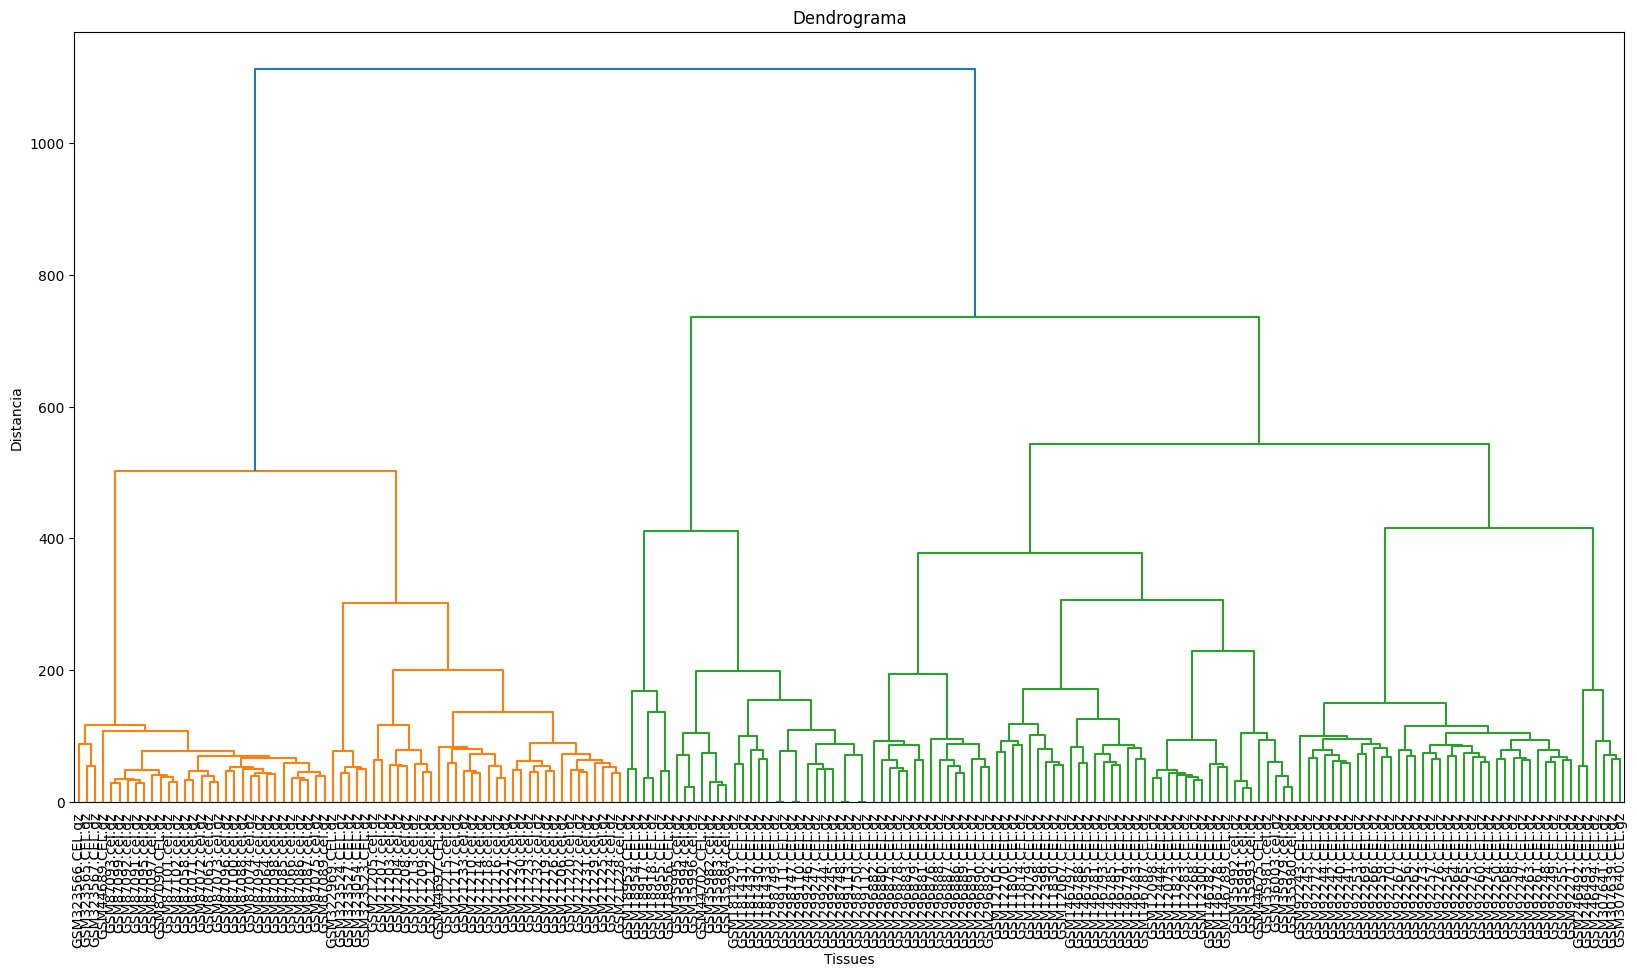

In [77]:
fig = plt.figure(figsize=(20, 10))
dendrogram(linkage(data_complete, method='ward'), labels=data_complete.index, leaf_font_size=10)
plt.title('Dendrograma')
plt.xlabel('Tissues')
plt.ylabel('Distancia')
plt.show()